In [16]:
import pandas as pd

# Read the data
df = pd.read_parquet('data/LDAP-training.parquet')
df = pd.concat([df, pd.read_parquet('data/LDAP-testing.parquet')])
df = pd.concat([df, pd.read_parquet('data/NetBIOS-training.parquet')])
df = pd.concat([df, pd.read_parquet('data/NetBIOS-testing.parquet')])
df['Label'].value_counts()

Benign           8836
LDAP             1884
DrDoS_LDAP       1440
NetBIOS           644
DrDoS_NetBIOS     598
Name: Label, dtype: int64

### t-SNE

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# apply t-SNE to the data
tsne = TSNE(n_components=2, verbose=1, random_state=123)

df_tsne = pd.DataFrame(tsne.fit_transform(df.drop('Label', axis=1)), columns=['PC1', 'PC2'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 13402 samples in 0.010s...
[t-SNE] Computed neighbors for 13402 samples in 0.581s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13402
[t-SNE] Computed conditional probabilities for sample 2000 / 13402
[t-SNE] Computed conditional probabilities for sample 3000 / 13402
[t-SNE] Computed conditional probabilities for sample 4000 / 13402
[t-SNE] Computed conditional probabilities for sample 5000 / 13402
[t-SNE] Computed conditional probabilities for sample 6000 / 13402
[t-SNE] Computed conditional probabilities for sample 7000 / 13402
[t-SNE] Computed conditional probabilities for sample 8000 / 13402
[t-SNE] Computed conditional probabilities for sample 9000 / 13402
[t-SNE] Computed conditional probabilities for sample 10000 / 13402
[t-SNE] Computed conditional probabilities for sample 11000 / 13402
[t-SNE] Computed conditional probabilities for sample 12000 / 13402
[t-SNE] Computed conditional probabilities for sam

In [22]:
df_tsne['Label'] = df['Label'].values
df_tsne

,PC1,PC2,Label
0,-85.692528,64.889244,NetBIOS
1,48.131630,11.303090,LDAP
2,54.768921,-19.412895,NetBIOS
3,55.863747,66.359627,LDAP
4,55.526539,63.249435,LDAP
...,...,...,...
13397,-16.405195,-81.899963,Benign
13398,-16.539991,-80.861618,Benign
13399,-16.405043,-81.900536,Benign
13400,-40.408428,-42.425949,Benign


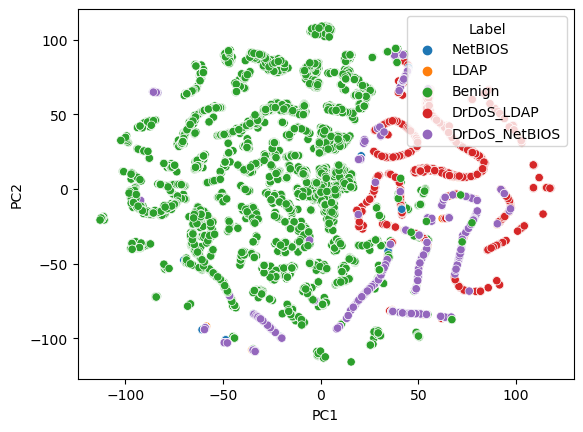

In [25]:
# scatter plot the data
def plot_tsne(df_tsne):
    sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne)
    plt.show()

plot_tsne(df_tsne)

https://towardsdatascience.com/how-to-tune-hyperparameters-of-tsne-7c0596a18868#:~:text=How%20to%20select%20optimal%20perplexity%3F

The optimal perplexity parameter depends on the number of samples in the dataset. As we have around 13k samples, we can try to set the perplexity to 100.

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 13402 samples in 0.005s...
[t-SNE] Computed neighbors for 13402 samples in 0.898s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13402
[t-SNE] Computed conditional probabilities for sample 2000 / 13402
[t-SNE] Computed conditional probabilities for sample 3000 / 13402
[t-SNE] Computed conditional probabilities for sample 4000 / 13402
[t-SNE] Computed conditional probabilities for sample 5000 / 13402
[t-SNE] Computed conditional probabilities for sample 6000 / 13402
[t-SNE] Computed conditional probabilities for sample 7000 / 13402
[t-SNE] Computed conditional probabilities for sample 8000 / 13402
[t-SNE] Computed conditional probabilities for sample 9000 / 13402
[t-SNE] Computed conditional probabilities for sample 10000 / 13402
[t-SNE] Computed conditional probabilities for sample 11000 / 13402
[t-SNE] Computed conditional probabilities for sample 12000 / 13402
[t-SNE] Computed conditional probabilities for sa

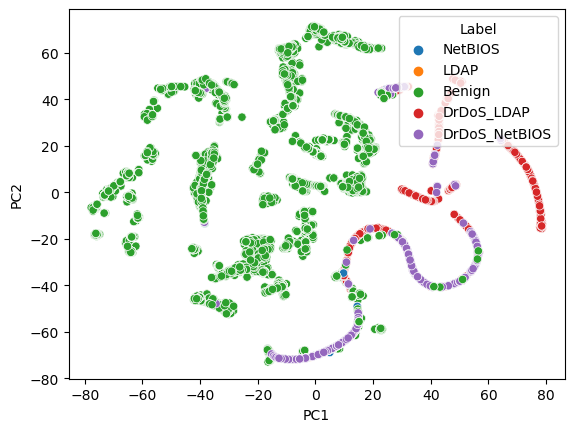

In [48]:
tsne100 = TSNE(n_components=2, verbose=1, random_state=123, perplexity=100)
df_tsne100 = pd.DataFrame(tsne100.fit_transform(df.drop('Label', axis=1)), columns=['PC1', 'PC2'])
df_tsne100['Label'] = df['Label'].values
plot_tsne(df_tsne100)